# DSCI - 303 - PROJECT 04
### FELIX CRADER

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

## Part 1: Loading the Dataset; Preliminary Analysis
We will start by loading the data into a dataframe.

In [2]:
diamonds = pd.read_csv('diamonds.txt', sep='\t')
diamonds.head(n=10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Now let us determine the size of the dataset.

In [3]:
np.shape(diamonds)

(53940, 10)

Next, the distribution of the columns in the data.

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Part 2: Filtering and Sorting
We will start by viewing the 5 most expensive diamonds in the dataset.

In [5]:
diamonds[['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='price', ascending=False).head(5)

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


Next, we will view the 5 least expensive diamonds.

In [6]:
diamonds.sort_values(by='price', ascending=True)[['price', 'carat', 'cut', 'color', 'clarity']].head(5)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


Now the 5 largest diamonds.

In [7]:
diamonds[diamonds['cut'] == 'Ideal'].sort_values(by='carat', ascending=False)[['price', 'carat', 'cut', 'color', 'clarity']].head(5)

,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


In [8]:
diamonds[diamonds['cut'] == 'Fair'].sort_values(by='carat', ascending=False)[['price', 'carat', 'cut', 'color', 'clarity']].head(5)

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Part 3: Working with Categorical Variables
We will create a list to specify the order for each of the three categorical variables.

In [9]:
clarity_levels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cut_levels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_levels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

In [10]:
diamonds.clarity = pd.Categorical(diamonds.clarity, clarity_levels)
diamonds.cut = pd.Categorical(diamonds.cut, cut_levels)
diamonds.color = pd.Categorical(diamonds.color, color_levels)

Now we make lists of named colors. 

In [11]:
clarity_pal = ['darkred', 'orangered', 'gold', 'lightgreen', 'limegreen', 'forestgreen', 'mediumseagreen', 'darkgreen']
cut_pal = ['saddlebrown', 'peru', 'wheat', 'powderblue', 'lightseagreen']
color_pal = ['blue', 'skyblue', 'lightblue', 'lightcoral', 'coral', 'red', 'darkred']

## Part 4: Displaying Counts for Categorical Variables
We will start this part by counting the number of diamonds for each level of cut.

In [12]:
diamonds['cut'].value_counts().sort_index()

cut
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: count, dtype: int64

In [13]:
diamonds['color'].value_counts().sort_index()

color
J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
Name: count, dtype: int64

In [14]:
diamonds['clarity'].value_counts().sort_index()

clarity
I1        741
SI2      9194
SI1     13065
VS2     12258
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
Name: count, dtype: int64

## Part 5: Scatterplots of Price Against Carat
We will not look at the relationship between 'price' and 'carat'.

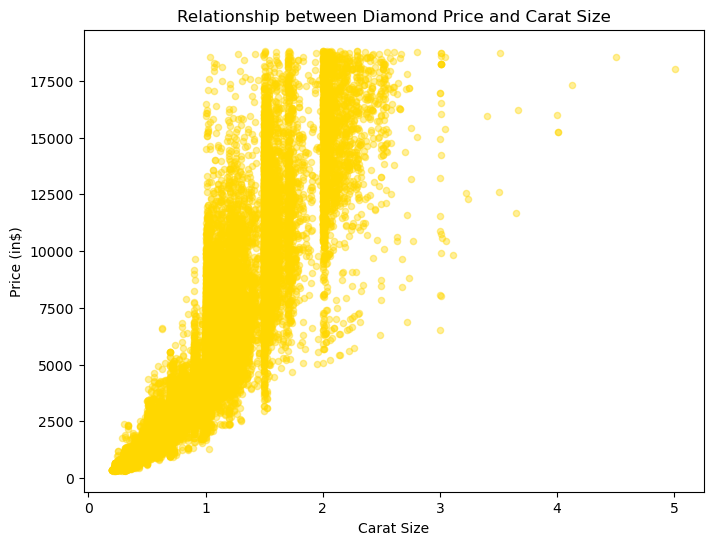

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(diamonds.carat, diamonds.price, s=20, alpha=0.4, c='gold')
plt.xlabel('Carat Size')
plt.ylabel('Price (in$)')
plt.title('Relationship between Diamond Price and Carat Size')
plt.show()

WE will now do the same figure but will show according to clarity.

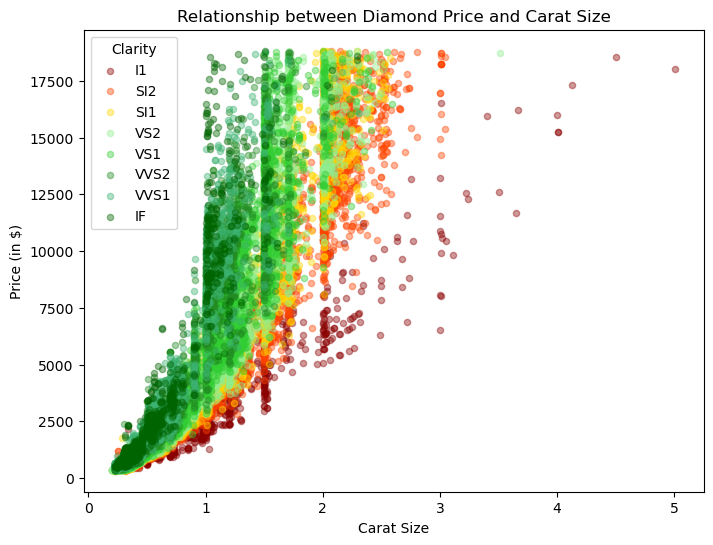

In [16]:
plt.figure(figsize=(8, 6))

for i, clarity in enumerate(clarity_levels):
    plt.scatter(diamonds[diamonds['clarity'] == clarity]['carat'], diamonds[diamonds['clarity'] == clarity]['price'], s=20, alpha=0.4, color=clarity_pal[i], label=clarity)

plt.title('Relationship between Diamond Price and Carat Size')
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.legend(title='Clarity')
plt.show()

We will now seperate the points for each of the eight clarity levels into its own subplots.

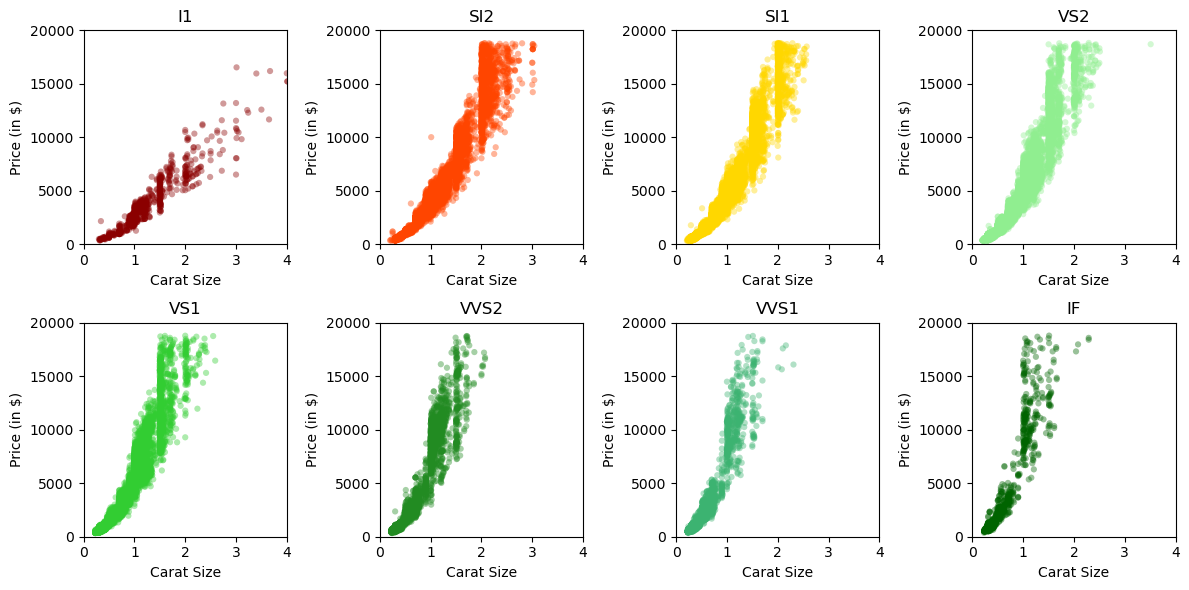

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

axes = axes.flatten()
for i, clarity in enumerate(clarity_levels):
    clar = diamonds[diamonds['clarity'] == clarity]
    axes[i].scatter(clar['carat'], clar['price'],s=20, alpha=0.4, color=clarity_pal[i], edgecolors='none')

    axes[i].set_title(clarity)
    axes[i].set_xlabel('Carat Size')
    axes[i].set_ylabel('Price (in $)')
    axes[i].set_xlim([0, 4])
    axes[i].set_ylim([0, 20000])
        
plt.tight_layout()
plt.show()

## Part 6: Applying Logarithmic Transformations
We are going to start by adding two new columns to the dataframe.

In [18]:
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])


Let's use histograms to explore the distribution of the prices and the log of the diamond prices.

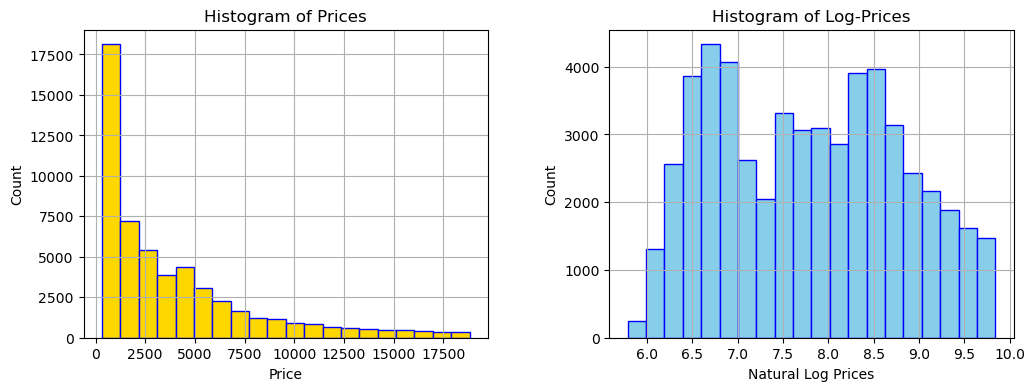

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

diamonds.hist('price', bins=20, edgecolor = 'b', color = 'gold', ax=axes[0])
diamonds.hist('ln_price', bins=20, edgecolor = 'b', color = 'skyblue', ax=axes[1])

axes[0].set_title('Histogram of Prices')
axes[1].set_title('Histogram of Log-Prices')
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Natural Log Prices')
axes[0].set_ylabel('Count')
axes[1].set_ylabel('Count')

plt.show()
plt.show()

We will now do the same but for carat sizes.

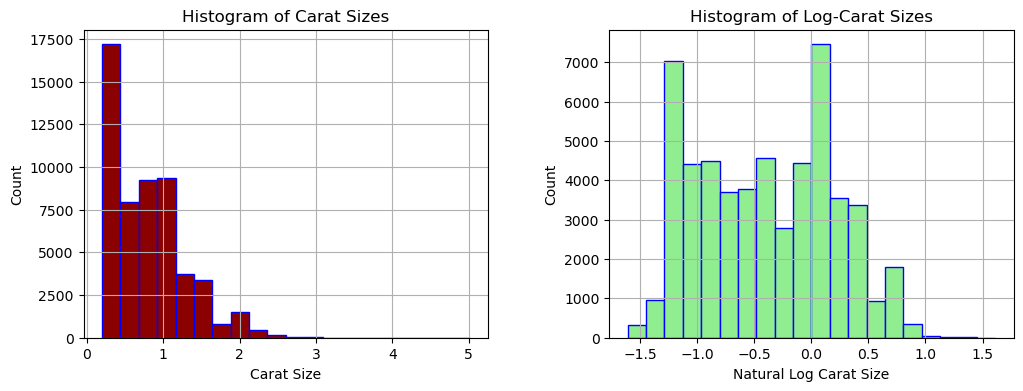

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

diamonds.hist('carat', bins=20, edgecolor = 'b', color = 'darkred', ax=axes[0])
diamonds.hist('ln_carat', bins=20, edgecolor = 'b', color = 'lightgreen', ax=axes[1])

axes[0].set_title('Histogram of Carat Sizes')
axes[1].set_title('Histogram of Log-Carat Sizes')
axes[0].set_xlabel('Carat Size')
axes[1].set_xlabel('Natural Log Carat Size')
axes[0].set_ylabel('Count')
axes[1].set_ylabel('Count')

plt.show()
plt.show()

## Part 7: Scatterplot of Transformed Variables
We will now create scatterplots for ln_prices and ln_carat with points colored according to their clarity.

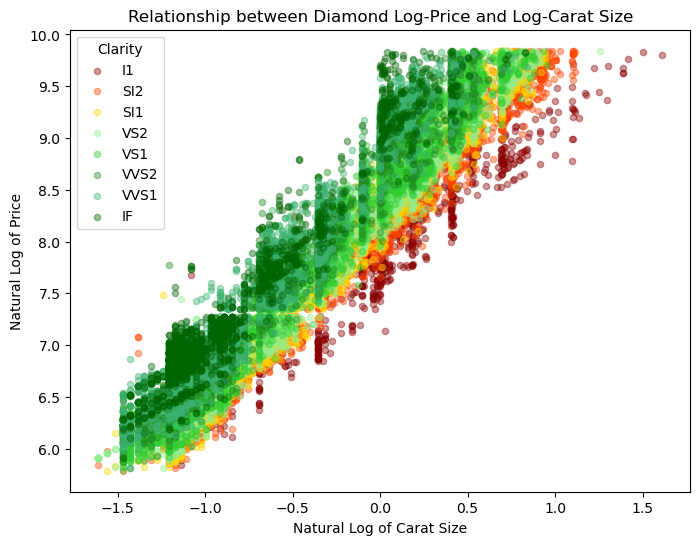

In [21]:
plt.figure(figsize=(8, 6))

for i, clarity in enumerate(clarity_levels):
    plt.scatter(diamonds[diamonds['clarity'] == clarity]['ln_carat'], diamonds[diamonds['clarity'] == clarity]['ln_price'], s=20, alpha=0.4, color=clarity_pal[i], label=clarity)

plt.title('Relationship between Diamond Log-Price and Log-Carat Size')
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')
plt.legend(title='Clarity')
plt.show()

## Part 8: Grouping by Cut
We will now create a grouped dataframe displaying mean price and carat size for each cut level. 

In [22]:
gb_cut = diamonds[['cut', 'price', 'carat']].groupby('cut').mean()
gb_cut

C:\Users\crade\AppData\Local\Temp\ipykernel_27232\599607181.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb_cut = diamonds[['cut', 'price', 'carat']].groupby('cut').mean()


,price,carat
cut,,
Fair,4358.757764,1.046137
Good,3928.864452,0.849185
Very Good,3981.759891,0.806381
Premium,4584.257704,0.891955
Ideal,3457.541970,0.702837


We will now display this using bar charts.

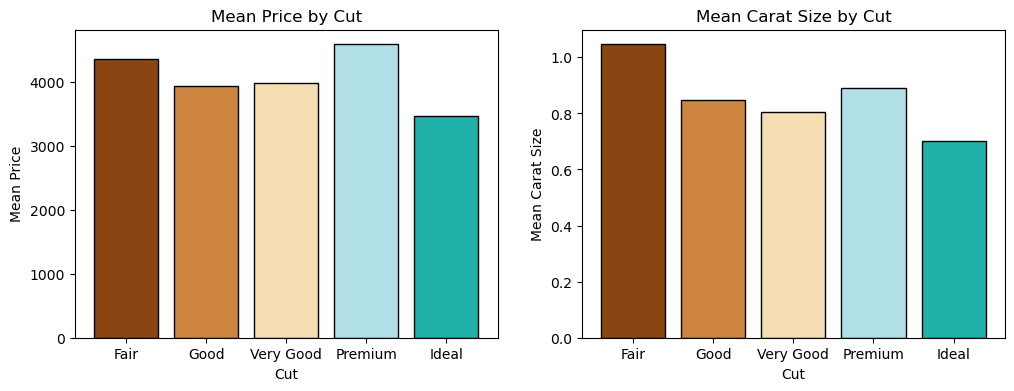

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(gb_cut.index, gb_cut['price'], color=cut_pal, edgecolor='black')
axes[0].set_xlabel('Cut')
axes[0].set_ylabel('Mean Price')
axes[0].set_title('Mean Price by Cut')
axes[1].bar(gb_cut.index, gb_cut['carat'], color=cut_pal, edgecolor='black')
axes[1].set_xlabel('Cut')
axes[1].set_ylabel('Mean Carat Size')
axes[1].set_title('Mean Carat Size by Cut')

plt.show()
plt.show()

## Part 9: Grouping by Color
We will make a dataframe grouped by mean price and carat size for each color level. 

In [24]:
gb_color = diamonds[['color', 'price', 'carat']].groupby('color').mean()
gb_color

C:\Users\crade\AppData\Local\Temp\ipykernel_27232\2226566199.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb_color = diamonds[['color', 'price', 'carat']].groupby('color').mean()


,price,carat
color,,
J,5323.818020,1.162137
I,5091.874954,1.026927
H,4486.669196,0.911799
G,3999.135671,0.771190
F,3724.886397,0.736538
E,3076.752475,0.657867
D,3169.954096,0.657795


We will use bar charts to display the information.

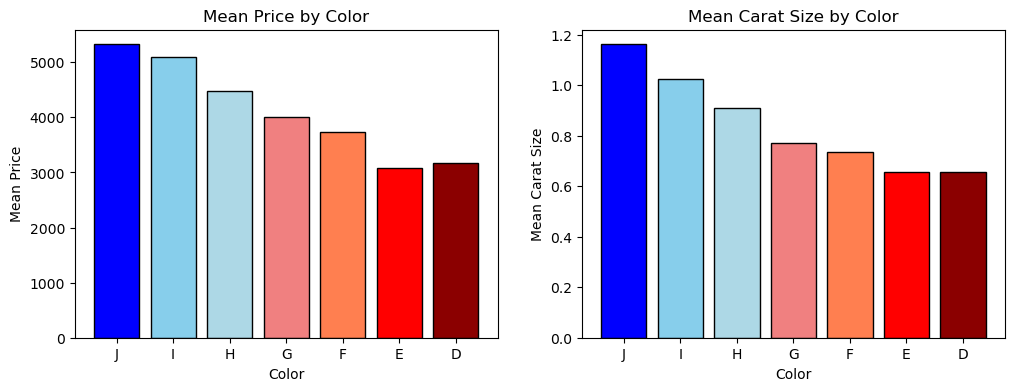

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(gb_color.index, gb_color['price'], color=color_pal, edgecolor='black')
axes[0].set_xlabel('Color')
axes[0].set_ylabel('Mean Price')
axes[0].set_title('Mean Price by Color')
axes[1].bar(gb_color.index, gb_color['carat'], color=color_pal, edgecolor='black')
axes[1].set_xlabel('Color')
axes[1].set_ylabel('Mean Carat Size')
axes[1].set_title('Mean Carat Size by Color')

plt.show()
plt.show()

## Part 10: Grouping by Clarity
We will now make another dataframe grouped by mean price and carat size for clarity level.

In [26]:
gb_clarity = diamonds[['clarity', 'price', 'carat']].groupby('clarity').mean()
gb_clarity

C:\Users\crade\AppData\Local\Temp\ipykernel_27232\3659298874.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb_clarity = diamonds[['clarity', 'price', 'carat']].groupby('clarity').mean()


,price,carat
clarity,,
I1,3924.168691,1.283846
SI2,5063.028606,1.077648
SI1,3996.001148,0.850482
VS2,3924.989395,0.763935
VS1,3839.455391,0.727158
VVS2,3283.737071,0.596202
VVS1,2523.114637,0.503321
IF,2864.839106,0.505123


We will now create two more bar charts to display the information in this dataframe.

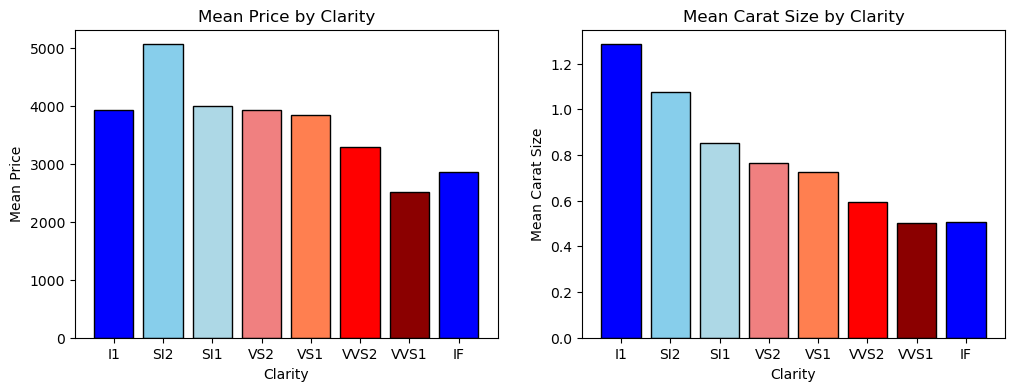

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(gb_clarity.index, gb_clarity['price'], color=color_pal, edgecolor='black')
axes[0].set_xlabel('Clarity')
axes[0].set_ylabel('Mean Price')
axes[0].set_title('Mean Price by Clarity')
axes[1].bar(gb_clarity.index, gb_clarity['carat'], color=color_pal, edgecolor='black')
axes[1].set_xlabel('Clarity')
axes[1].set_ylabel('Mean Carat Size')
axes[1].set_title('Mean Carat Size by Clarity')

plt.show()
plt.show()